In [45]:
import pandas as pd
df= pd.read_csv('D:\CSV\swing_states_2008.csv')
df

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04
...,...,...,...,...,...,...
217,OH,Hamilton County,425086,225213,195530,53.53
218,OH,Highland County,19186,6856,11907,36.54
219,OH,Hocking County,12961,6259,6364,49.58
220,OH,Licking County,82356,33932,46918,41.97


BELOW METHODS OF EDA ARE GRAPHICAL EDA.

Histogram:

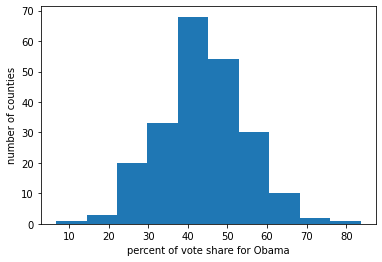

In [46]:
import matplotlib.pyplot as plt
plt.hist(df['dem_share'])
plt.xlabel("percent of vote share for Obama")
plt.ylabel("number of counties")
plt.show()

# import seaborn as sns
# sns.set()
# plt.hist(df['dem_share'])
# plt.xlabel("percent of vote share for Obama")
# plt.ylabel("number of counties")
# plt.show()

#### INSIGHT: Most of counties gave 40-50% vote share for Obama. Choice of bins can make interpretation of same sample different.

SwarmPlot:

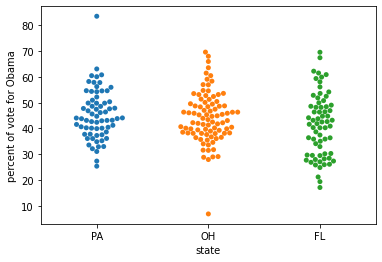

In [47]:
# This plot used because of wrong interpretation by 
import seaborn as sns
sns.swarmplot(x='state', y='dem_share', data=df)
plt.xlabel("state")
plt.ylabel("percent of vote for Obama")
plt.show()
#each dot represnts A COUNTY.

#### INSIGHT: Obama got less tham 50% of votes in majority of counties in each of 3 swing states.

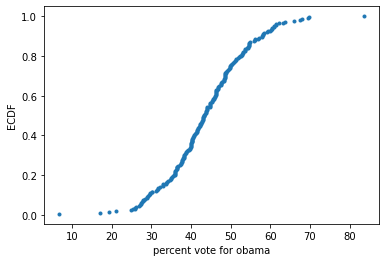

In [48]:
#ECDF: Empirical(actual result rather than theoritical) Cumulative Distribution Function:
import numpy as np
data= df['dem_share']
n=len(data)
# print(n)
x= np.sort(data)
y=np.arange(1, n+1) /n
# print(y)
plt.xlabel("percent vote for obama")
plt.ylabel("ECDF")
plt.plot(x, y, marker=".",linestyle='none')
plt.show()

#### INSIGHT: 20% of counties in swing states had 36% or less vote for Obama. 75% of counties in swing states had 50% or less of its peole vote for Obama

In [49]:
import numpy as np
def ecdf(data):
    n=len(data)
#     print(n)
    x= np.sort(data)
    y=np.arange(1, n+1) /n
#     print(y)
    
    return x,y

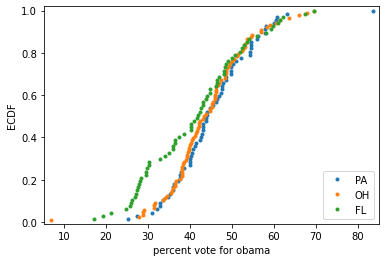

In [75]:
PA= df[df['state']=='PA']
OH= df[df['state']=='OH']
FL= df[df['state']=='FL']

x_p,y_p=ecdf(PA['dem_share'])
x_o, y_o=ecdf(OH['dem_share'])
x_f, y_f=ecdf(FL['dem_share'])
plt.xlabel("percent vote for obama")
plt.ylabel("ECDF")
plt.plot(x_p, y_p, marker=".",linestyle='none')
plt.plot(x_o, y_o, marker=".",linestyle='none')
plt.plot(x_f, y_f, marker=".",linestyle='none')



plt.legend(('PA', 'OH', 'FL'), loc='lower right')
plt.margins(0.02) #keeps data off plot edges

#### INSIGHT: OH and PA are similar, with PA having slightly more democratic counties. FL had a greater fraction of heavily republican counties.

In [51]:
df_all_states= pd.read_csv('D:/CSV/all_states_2008.csv')
df_all_states

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west
...,...,...,...,...,...,...,...,...
3148,OH,Hamilton County,425086,225213,195530,4343,53.53,east
3149,OH,Highland County,19186,6856,11907,423,36.54,east
3150,OH,Hocking County,12961,6259,6364,338,49.58,east
3151,OH,Licking County,82356,33932,46918,1506,41.97,east


QUANTITATIVE EDA:

In [52]:
# Summary stats tht r immune to extreme data(outliers):median(50th percentile), but outliers r not always erroneous
# 50th percentile: 50% of data are less than median, 
# 25th percentile:value of data point tht is greater than 25% of sorted data
percentiles= np.percentile(df_all_states['dem_share'], [25,50,75])
print(percentiles)

[31.98 41.77 51.28]


In [53]:
df_all_states.groupby('east_west').state.count()

east_west
east    1607
west    1546
Name: state, dtype: int64

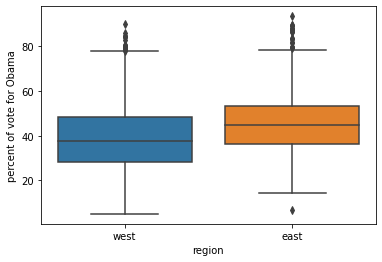

In [54]:
sns.boxplot(x='east_west', y='dem_share', data=df_all_states)
plt.xlabel('region')
plt.ylabel('percent of vote for Obama')
plt.show()

#### INSIGHT: east region of US had more vote share for Obama than west

In [55]:
# VARIANCE: avg of squared dist from mean. 1/n(summation of (xi- X)^2), X is mean
# sqrt root of variance is Standard Deviation which has same units of data(vote share of obama)
print(np.mean(PA['dem_share']))
print(np.std(PA['dem_share']))  
print()

print(np.mean(OH['dem_share']))
print(np.std(OH['dem_share'])) 
print()

print(np.mean(FL['dem_share']))
print(np.std(FL['dem_share'])) 
# 41.32 +- 12.14 is within 1 standard deviation
# FL is more spread than PA and OH

45.476417910447765
9.729595825615187

44.31818181818181
9.83931267756758

41.32507462686568
12.142602117687158


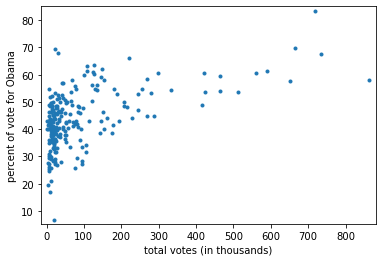

In [56]:
fig, ax=plt.subplots()
ax.scatter(df['total_votes']/1000, df['dem_share'], marker='.')
plt.xlabel('total votes (in thousands)')
plt.ylabel('percent of vote for Obama')
plt.margins(0.02)
plt.show()

#### INSIGHT: 12 most populous counties all voted for obama n most of counties with small poplulation voted for mccain

In [57]:
# COVARIANCE:
# How Obama's vote share varies with total vote count(how both vary together): COVARIANCE.
# taking mean of total vote and percent of vote, and takin them as axis.
# If both x,y are positive-when county is populous then it has more votes for Obama-covariance is positive
# how 2 variables depend on each other- covariance/std of x* std of y= Pearson correlation:
#  dimensionless Quantity ranges from -1 to 1

covariance_matrix= np.cov(df['total_votes']/1000, df['dem_share'])
print(covariance_matrix)
covariance= covariance_matrix[0,1]
print(covariance)
# other 2 values are its self-variance

[[20245.10393632   817.30936184]
 [  817.30936184   114.76344739]]
817.3093618405288


In [58]:
# CORRELATION:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y )

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r=pearson_r(df['total_votes'], df['dem_share'])

# Print the result
print(r)

0.536197364958678


STATISTICAL INFERENCE: involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions.

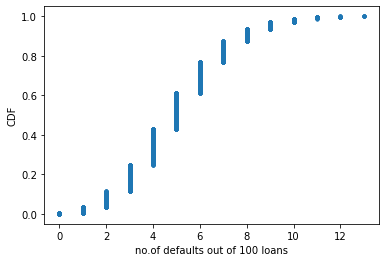

In [59]:
# This CDF is that of the Binomial distribution.
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults= np.random.binomial(100, 0.05, size=10000)

# Compute CDF: x, y
x,y= ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y, linestyle='none', marker='.')
plt.xlabel("no.of defaults out of 100 loans")
plt.ylabel("CDF")

# Show the plot
plt.show()
# higher the gradient, more distribution is going to b there around tht area 

In [60]:
print(len(n_defaults))
print(max(n_defaults))

10000
13


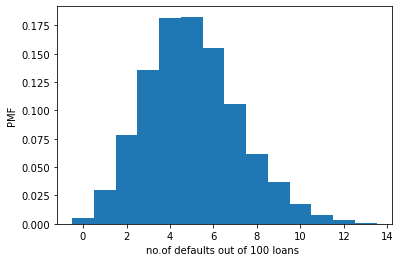

In [61]:
# PMF of the Binomial distribution as a histogram
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, bins=bins, density=True)
#density=True,it sets the height of bars such tht totla area of  bars is =1, this is called Normalisation.
# SO tht Histogram approximates PMF, where area under PMF gives probability.

# Label axes
plt.xlabel("no.of defaults out of 100 loans ")
plt.ylabel("PMF")


# Show the plot
plt.show()

# y axis values of pmf represents gradient/slope values of cdf 

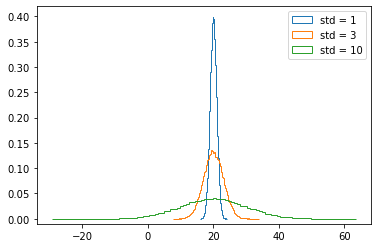

In [62]:
# PDF: Area under Pdf gives Probabilities.
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1,size=100000)
samples_std3 = np.random.normal(20, 3,size=100000)
samples_std10= np.random.normal(20, 10,size=100000)

# Make histograms
plt.hist(samples_std1, bins=100, histtype='step', density=True)
plt.hist(samples_std3, bins=100, histtype='step', density=True)
plt.hist(samples_std10, bins=100, histtype='step', density=True)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


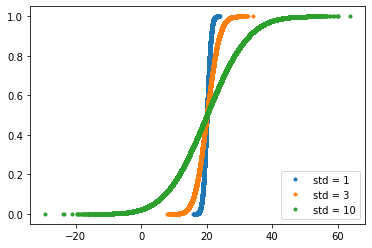

In [63]:
# shape of its CDFs
# Generate CDFs
x_std1, y_std1=ecdf(samples_std1)
x_std3, y_std3=ecdf(samples_std3)
x_std10, y_std10=ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, linestyle='none', marker='.')
plt.plot(x_std3, y_std3, linestyle='none', marker='.')
plt.plot(x_std10, y_std10, linestyle='none', marker='.')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


#### INSIGHT: The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation. More the gradient/slope of CDF, higher will be the y axis values of PMF 

POISSON PROCESS: timing of next event is completely independent of when previous event happened.
Eg: natural births in given hospital,meteor strikes


In [64]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson= np.random.poisson(10, size=10000) #10 is mean number of successes per time interval

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p, so that np is always 10.
n = [20, 100, 1000] 
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000) #n is benoulli trails, p is probability of success

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0437 3.1927715718478824
n = 20 Binom: 9.9992 2.234099227876864
n = 100 Binom: 10.0363 2.9764042584971553
n = 1000 Binom: 10.0005 3.165738420969111


#### INSIGHT: The means are all about the same. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small)

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times.

In [65]:
belmont_no_outliers= np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

In [66]:
belmont_no_outliers.shape

(89,)

149.22101123595507 1.6186456017743405


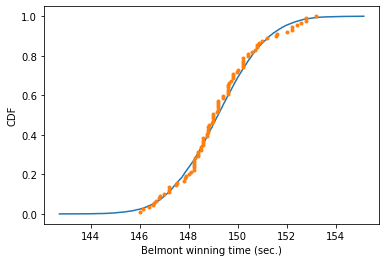

In [67]:
# Compute mean and standard deviation: mu, sigma
mu=np.mean(belmont_no_outliers)
sigma= np.std(belmont_no_outliers)
print(mu, sigma)

# Sample out of a normal distribution with this mu and sigma: samples
samples=np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x,y= ecdf(belmont_no_outliers)
x_theor, y_theor= ecdf(samples)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


#### INSIGHT: The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

In [68]:
# Take a million samples out of the Normal distribution: samples
samples= np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob= np.sum(samples<=144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000637


#### INSIGHT: We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle, when a batter gets all four kinds of hits in a single game, is another rare baseball event. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.
what is the total waiting time for the arrival of two different Poisson processes in succession? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

In [76]:
def successive_poisson(tau1, tau2, size=100000):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=100000)
#     print(t1.shape)
    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=100000)
#     print(t2.shape)
    total_waiting_time=t1+t2
#     print(total_waiting_time.shape)
    return total_waiting_time

using your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

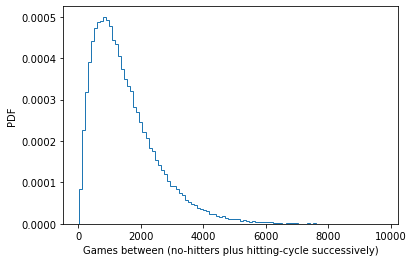

In [77]:
# Draw samples of waiting times: waiting_times
waiting_times= successive_poisson(764, 715)

# Make the histogram
plt.hist(waiting_times, bins=100, density=True,  histtype='step')


# Label axes
plt.xlabel("Games between (no-hitters plus hitting-cycle successively)")
plt.ylabel("PDF") #approximation to the PDF

# Show the plot
plt.show()


#### INSIGHT: probability density is too less about 0.0005 tht these events will happen successively

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times

In [71]:
nohitter_times= np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

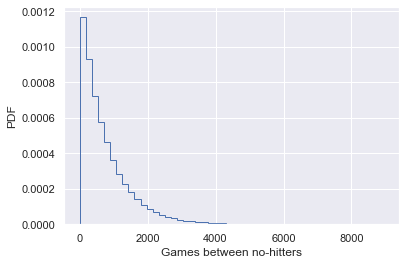

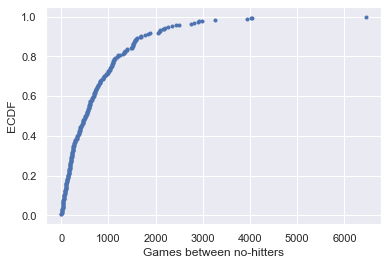

In [87]:
sns.set()
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
           bins=50, density=True,  histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF') #approximation to the PDF

# Show the plot
plt.show()
#  We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.
x,y= ecdf(nohitter_times)
plt.plot(x,y, linestyle="none", marker='.')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('ECDF') #approximation to the PDF
plt.show()
# print(inter_nohitter_time)

#### INSIGHT: 1000 games or less games b/w no-hitters have approx 70% chance of happenning, 2000 games or less b/w no-hitters have 90% chance of happening. Max there can b 6000 games or less games have 100%chance of happening b/w no-hitter game

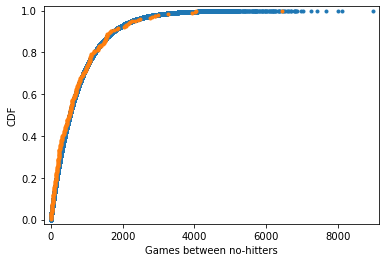

In [73]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor , y_theor, marker='.', linestyle='none')
plt.plot(x,y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

#### INSIGHT: Exponential distribution describes the observed data(as graph seems diff from nomal ecdf graph, it also resembles exponential func graph). Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

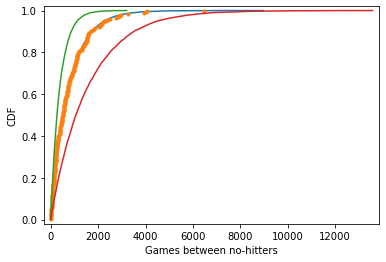

In [74]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

#### INSIGHT: the value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.